In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv("50_Startups.csv")

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [51]:


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [6]:
print(data.shape)
print(data.size)

(50, 4)
200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

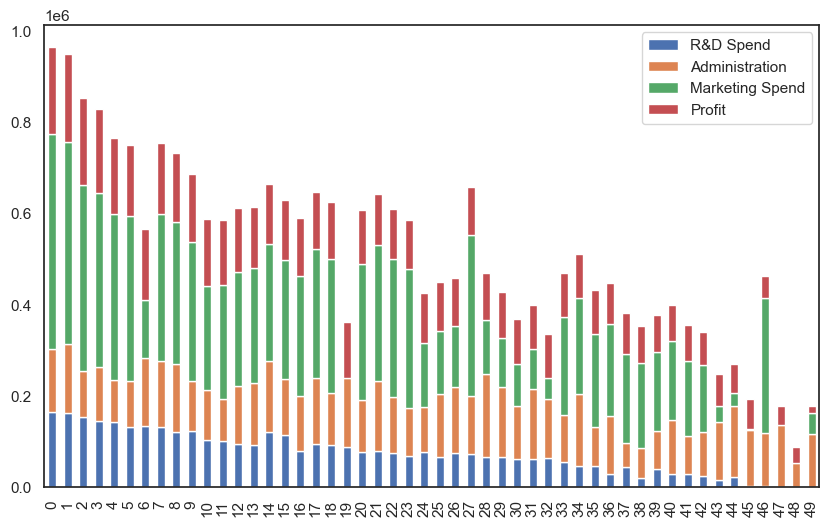

In [50]:
data.plot(kind='bar', stacked='true',figsize=(10,6))

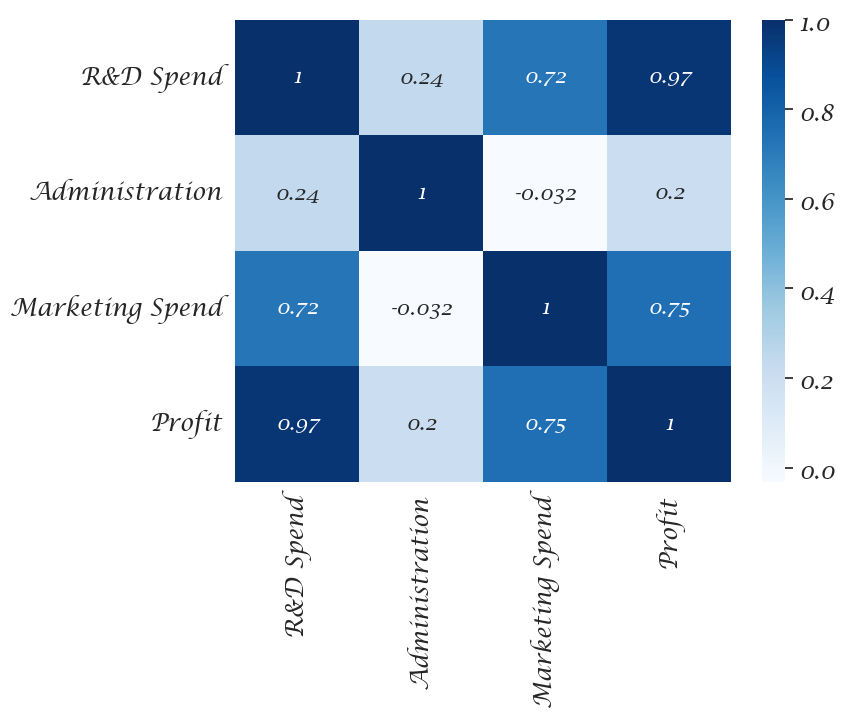

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues');

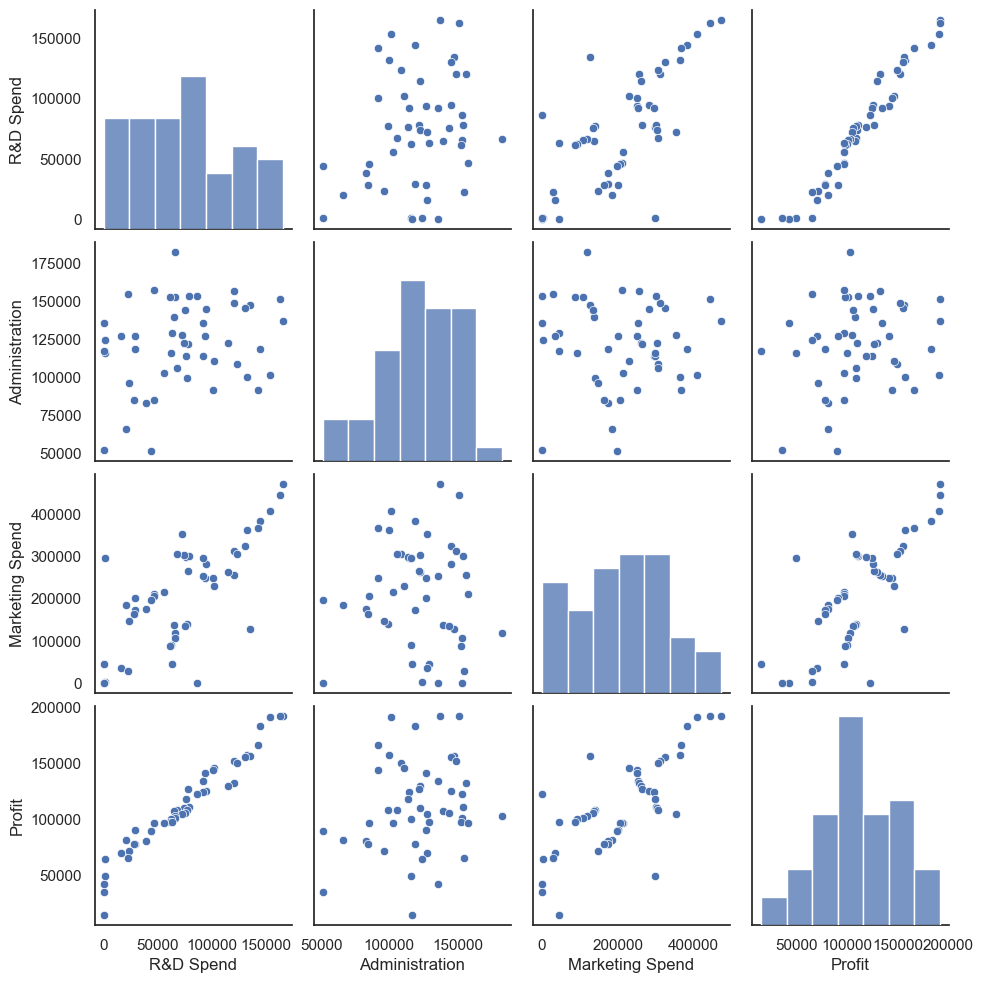

In [52]:
sns.pairplot(data)
plt.show()

<AxesSubplot:>

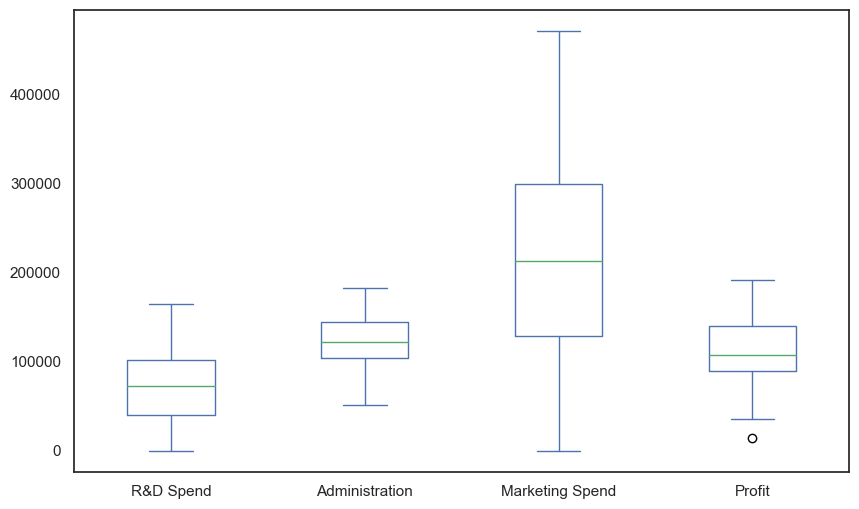

In [53]:
data.plot(kind='box',figsize=(10,6))

In [14]:
# Correlation Matrix

companies_correlation = data.corr()
companies_correlation['Profit'].sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

In [19]:

X = data.drop(["Profit"],axis=1)
y = data['Profit']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score

model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model_LinearRegression.predict(X_test)

In [23]:
r2 = r2_score(y_test, y_pred).round(4)

In [25]:
mse = mean_squared_error(y_test, y_pred).round(4)

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(4)

In [27]:
mae = mean_absolute_error(y_test,y_pred).round(4)

In [28]:
print('R2 Score : ', r2)
print('MSE      : ', mse)
print('RMSE     : ', rmse)
print('MAE      : ', mae)

R2 Score :  0.9511
MSE      :  62357479.6176
RMSE     :  7896.6752
MAE      :  6472.0626


In [29]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForestRegressor = RandomForestRegressor()
model_RandomForestRegressor.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
pred_R= model_RandomForestRegressor.predict(X_test)

In [32]:
r2_R = r2_score(y_test, pred_R).round(4)

In [33]:
mse_R= mean_squared_error(y_test, pred_R).round(4)

In [34]:
rmse_R= np.sqrt(mean_squared_error(y_test, pred_R)).round(4)

In [35]:
mae_R= mean_absolute_error(y_test, pred_R).round(4)

In [36]:

print('R2 Score  : ', r2_R)
print('MSE       : ', mse_R)
print('RMSE      : ', rmse_R)
print('MAE       : ', mae_R)

R2 Score  :  0.9496
MSE       :  64237105.1678
RMSE      :  8014.8054
MAE       :  6628.0136


In [37]:
from sklearn.neighbors import KNeighborsRegressor

model_KNeighborsRegressor = KNeighborsRegressor()
model_KNeighborsRegressor.fit(X_train, y_train)

KNeighborsRegressor()

In [38]:
pred_K = model_KNeighborsRegressor.predict(X_test)

In [40]:
r2_K = r2_score(y_test, pred_K).round(4)

In [41]:
mse_K = mean_squared_error(y_test, pred_K).round(4)

In [42]:
rmse_K= np.sqrt(mean_squared_error(y_test, pred_K)).round(4)

In [43]:
mae_K = mean_absolute_error(y_test, pred_K).round(4)

In [44]:

print('R2 Score  : ', r2_K)
print('MSE       : ', mse_K)
print('RMSE      : ', rmse_K)
print('MAE       : ', mae_K)

R2 Score  :  0.7894
MSE       :  268235087.7682
RMSE      :  16377.8841
MAE       :  12449.904


In [45]:
models = pd.DataFrame({
    
    'Model': [
        'LinearRegression', 'RandomForestRegressor','KNeighborsRegressor'
    ],
    
    'R2 Score': [
        r2,r2_R,r2_K
    ],
    
    'MSE': [
        mse,mse_R,mse_K
    ],
    
    'RMSE': [
        rmse,rmse_R,rmse_K
    ],
    
    'MAE': [
        mae, mae_R,mae_K
    ]
    
})

In [46]:
models


,Model,R2 Score,MSE,RMSE,MAE
0,LinearRegression,0.9511,6.235748e+07,7896.6752,6472.0626
1,RandomForestRegressor,0.9496,6.423711e+07,8014.8054,6628.0136
2,KNeighborsRegressor,0.7894,2.682351e+08,16377.8841,12449.9040


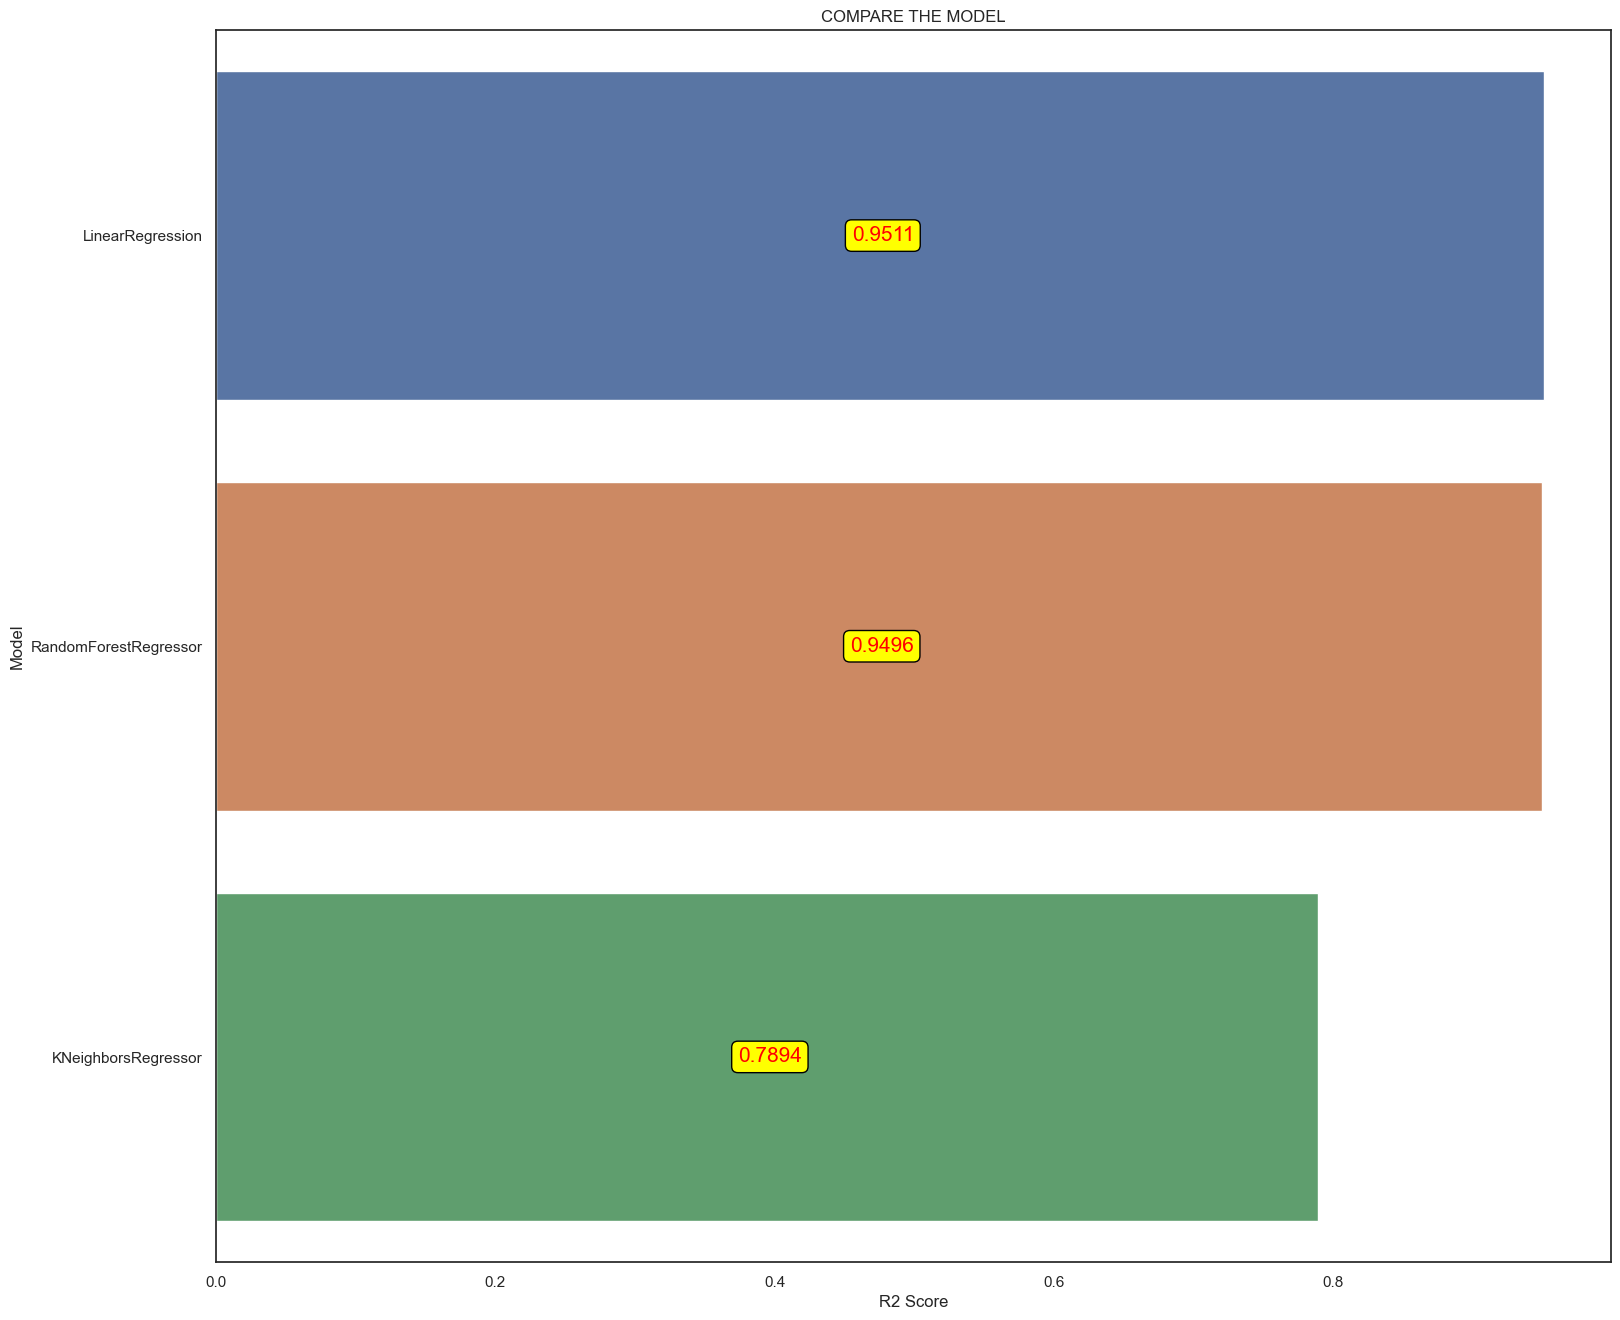

In [48]:
p = plt.figure(figsize=(18,16))

p = sns.set_theme(style="white")

p= models=models.sort_values(by='R2 Score',ascending=False)[:20]

p = sns.barplot(y= 'Model', x= 'R2 Score', data= models)

for container in p.containers:
    p.bar_label(container,label_type = 'center',padding = 2,size = 15,color = "Red",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "yellow", "edgecolor": "black", "alpha": 1})
plt.title('COMPARE THE MODEL')
plt.xlabel('R2 Score')
plt.ylabel('Model');

In [ ]:
#From the result of the model it is concluded that the best model is Linear Regression and the worst model is KNeighborsRegressor